# How to use the converter utility

This tool converts the input internally calibrated mean spectra from the continuous representation to a sampled form.

## Basic usage

In [1]:
# Import the tool
from gaiaxpy import convert
# Path to file with XP CONTINUOUS RAW data (csv, ecsv, fits, or xml)
f = '/home/drm/GaiaXPy/tests/files/xp_continuous/XP_CONTINUOUS_RAW_dr3int6.fits'

#### The converter returns two different outputs: 

 1. The values for all sampled spectra as a pandas DataFrame.
 2. The sampling used to convert the input spectra in pseudo-wavelength. This sampling should be an iterable (e.g. a NumPy array), the minimum accepted value is -10 and the maximum is 70. The default sampling is numpy.linspace(0, 60, 600).

In [2]:
converted_spectra, sampling = convert(f)
converted_spectra

source_id  xp                                               flux  \
0          6  BP  [790.6652760273903, 816.0488321107772, 838.088...   
1          6  RP  [908.9968995861024, 988.5280913043142, 1071.87...   
2          4  BP  [15.117857072361456, 17.545174204016977, 20.14...   
3          4  RP  [6.5153802457522785, 7.081726114227435, 7.6757...   

                                          flux_error  
0  [51.12808805755064, 52.46049740480984, 53.5705...  
1  [114.90126995378492, 116.22868541113809, 116.8...  
2  [6.55554367553648, 6.695615615689135, 6.804558...  
3  [0.9436286507422352, 0.9450255485429504, 0.940...

### Input types

The input does not have to be a path to a file. There are other options: a pandas DataFrame, an ADQL query or a list of sourceIds.

#### Passing a DataFrame

In [3]:
import pandas as pd

f = '/home/drm/GaiaXPy/tests/files/xp_continuous/XP_CONTINUOUS_RAW_dr3int6.csv'
df = pd.read_csv(f) # The values in the DataFrame can be edited if the user wishes to do so.

converted_spectra, sampling = convert(df)
converted_spectra

source_id  xp                                               flux  \
0          6  BP  [790.6652760273903, 816.0488321107772, 838.088...   
1          6  RP  [908.9968995861024, 988.5280913043142, 1071.87...   
2          4  BP  [15.117857072361456, 17.545174204016977, 20.14...   
3          4  RP  [6.5153802457522785, 7.081726114227435, 7.6757...   

                                          flux_error  
0  [51.128087665439566, 52.46049701409262, 53.570...  
1  [114.90126806544902, 116.22868348669782, 116.8...  
2  [6.555543736072461, 6.695615678678378, 6.80455...  
3  [0.9436286353147278, 0.9450255340198569, 0.940...

#### Running a query

**Important note**: Currently the data in the Gaia Archive is not public. The following code will <span style="color:red">not</span> work until DR3.

In [4]:
query_input = "select TOP 2 source_id from user_dr3int6.gaia_source where has_xp_continuous = 'True'"
converted_spectra, sampling = convert(query_input)
converted_spectra

INFO: Login to gaia TAP server [astroquery.gaia.core]
User: druzmier
Password: ········
OK
INFO: Login to gaia data server [astroquery.gaia.core]
OK
INFO: Query finished. [astroquery.utils.tap.core]


source_id  xp                                               flux  \
0  6030020833890693248  BP  [9.25655942031924, 9.704017573605816, 10.13033...   
1  6030020833890693248  RP  [7.486068042729214, 8.016885302844601, 8.56322...   
2  6030064028385961344  BP  [1.643567813219948, 1.7677135472274004, 1.8932...   
3  6030064028385961344  RP  [2.5606551733926333, 2.7662244174915362, 2.978...   

                                          flux_error  
0  [2.467990582349073, 2.5096246553216672, 2.5395...  
1  [1.538632626158625, 1.5589587619418803, 1.5712...  
2  [1.48517091514435, 1.508713194396786, 1.525715...  
3  [1.3121525986663758, 1.34090699773081, 1.36418...

#### Passing a list

A list of sourceIds can be passed to the converter as the first argument. The converter will then query the Archive for these objects.

In [5]:
sources_list = ['6030020833890693248', 6030064028385961344] # The sourceIds can be string or long.
converted_spectra, sampling = convert(sources_list)
converted_spectra

INFO: Login to gaia TAP server [astroquery.gaia.core]
User: druzmier
Password: ········
OK
INFO: Login to gaia data server [astroquery.gaia.core]
OK


source_id  xp                                               flux  \
0  6030020833890693248  BP  [9.25655942031924, 9.704017573605816, 10.13033...   
1  6030020833890693248  RP  [7.486068042729214, 8.016885302844601, 8.56322...   
2  6030064028385961344  BP  [1.643567813219948, 1.7677135472274004, 1.8932...   
3  6030064028385961344  RP  [2.5606551733926333, 2.7662244174915362, 2.978...   

                                          flux_error  
0  [2.467990582349073, 2.5096246553216672, 2.5395...  
1  [1.538632626158625, 1.5589587619418803, 1.5712...  
2  [1.48517091514435, 1.508713194396786, 1.525715...  
3  [1.3121525986663758, 1.34090699773081, 1.36418...

## Advanced usage

Additional arguments can be passed to the converter.

These are:
1. sampling
2. truncation
3. output_path
3. output_file
4. output_format
5. save_file

### Sampling

A custom sampling can be passed to the function. This sampling should be an iterable (list, tuple, generator, or preferably a NumPy array). If no sampling is given, the default sampling is returned.

The default sampling of the converter corresponds to numpy.linspace(0., 60., 600.) in pseudo-wavelength.

The minimum value allowed in the sampling is -10, and the maximum is 70. The program will raise an error is the sampling does not comply.

In [6]:
import numpy as np

converted_spectra_default, default_sampling = convert(df.iloc[[0]])
converted_spectra, custom_sampling = convert(f, sampling=np.arange(-10, 70, 0.5))
converted_spectra

source_id  xp                                               flux  \
0          6  BP  [1.3082126778732341e-05, 5.4669320529179805e-0...   
1          6  RP  [2.103162458167948e-06, 8.936766026982058e-06,...   
2          4  BP  [-2.711554384665641e-06, -9.74899522327931e-06...   
3          4  RP  [-3.125339376302649e-10, 8.193829976216151e-09...   

                                          flux_error  
0  [3.825912328340359e-06, 1.4022303133483225e-05...  
1  [5.078924195073175e-06, 1.9682498669323115e-05...  
2  [4.941224651787589e-07, 1.8211816533255976e-06...  
3  [5.086054060015767e-08, 1.9680526890289216e-07...

The results can be plotted using the plotter utility.

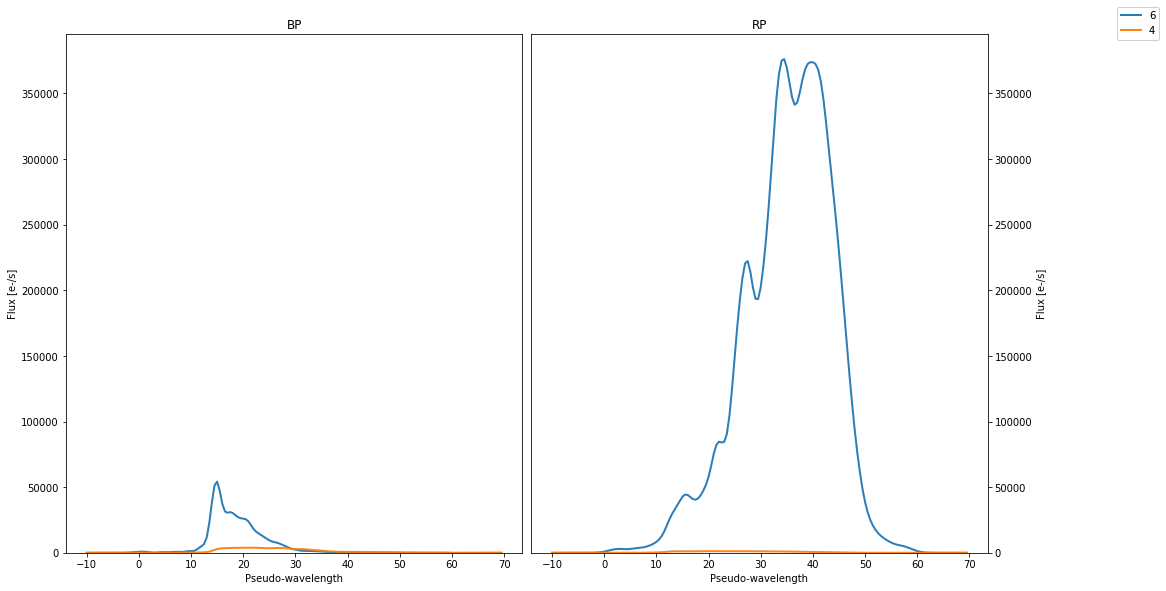

In [7]:
from gaiaxpy import plot_spectra
# multi allows the spectra to appear in the same canvas
plot_spectra(converted_spectra, sampling=custom_sampling, multi=True)

The figure can be saved too.

In [8]:
plot_spectra(converted_spectra, sampling=custom_sampling, multi=True, output_path='/home/drm/Desktop', show_plot=False)

### Truncation

The source mean BP/RP spectrum is described as a combination of basis functions. Particularly for faint sources or sources with a low number of observations, it is useful to represent the spectrum using a smaller set of basis functions to avoid higher-order bases fitting the noise in the observed data.

The truncation parameter is a boolean which toggles the truncation of the set of bases.

In [9]:
first_source = df.drop([0]) # We'll use only the first source (sourceId 4) in the demonstration
non_truncated_spectra, sampling = convert(first_source) # truncation is False by default
truncated_spectra, _ = convert(first_source, truncation=True)

We can use GaiaXPy's plot spectra utility to see the differences in the results.

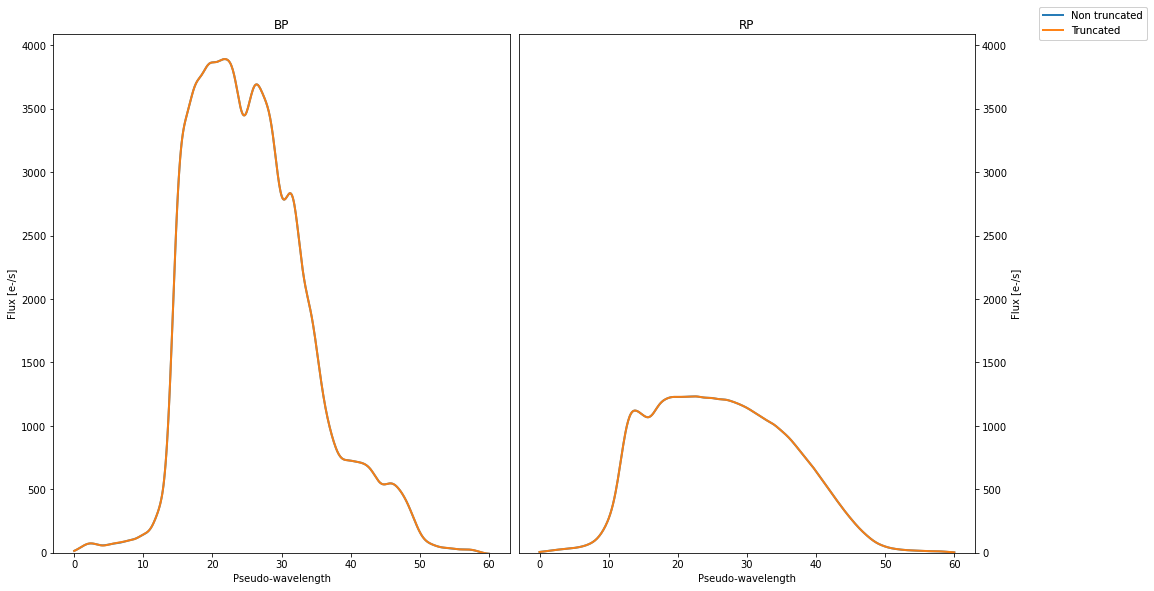

In [10]:
from gaiaxpy import plot_spectra
# Construct a DataFrame so we can plot both sources using just one function call
data = pd.concat([non_truncated_spectra, truncated_spectra]).reset_index(drop=True)
# As both spectra we want to plot have the same sourceId, we'll rename them to get descriptive labels
data['source_id'][0:2] = 'Non truncated'
data['source_id'][2:4] = 'Truncated'
plot_spectra(data, sampling=sampling, multi=True)

The differences between the truncated and not truncated versions are too small to be seen in the previous plot. But we can compare the values.

In [11]:
# We'll get the flux values of the BP band of the first spectrum in the data
non_truncated_bp_flux = data[(data['source_id'] == 'Non truncated') & (data['xp'] == 'BP')]['flux'].iloc[0]
truncated_bp_flux = data[(data['source_id'] == 'Truncated') & (data['xp'] == 'BP')]['flux'].iloc[0]
# We can then compute the absolute differences
abs_differences = np.abs(non_truncated_bp_flux - truncated_bp_flux)
# And find the values and indices of those differences
min_diff = np.min(abs_differences)
max_diff = np.max(abs_differences)
print(f'The length of the sampling is {len(non_truncated_bp_flux)}.')
print(f'Minimum difference: {min_diff}. Index of minimum difference: {np.where(abs_differences == min_diff)[0][0]}.')
print(f'Maximum difference: {max_diff}. Index of maximum difference: {np.where(abs_differences == max_diff)[0][0]}.')

The length of the sampling is 600.
Minimum difference: 1.736381318551139e-05. Index of minimum difference: 223.
Maximum difference: 1.7060870650311983. Index of maximum difference: 64.


### Output_path, output_file, output_format, save_file

Three parameters: **output_path**, **output_file**, and **output_format** define the entire path of the resulting file.

The default output path is the current path. If the given output path does not exist, it will be created.

The default output file name is 'output_spectra'. 

The default output format is the format of the input file (i.e. if the input file is a 'fits', then the output file will be a FITS file by default.), or CSV in any other case (DataFrame, ADQL query or list).

**NOTE: If a file with the same path and name already exists, it will be AUTOMATICALLY OVERWRITTEN.**

In [12]:
converted_spectra, _ = convert(f, output_path='/home/drm/Desktop', output_file='my_file', output_format='ecsv')

The additional parameter **save_file** is a boolean that tells the program whether to save the results or not.
If 'output_file' is given but 'save_file' is set to False, a warning will be raised.

In [13]:
converted_spectra, _ = convert(f, output_file='my_file', output_format='.csv', save_file=False)

/home/drm/GaiaXPy/gaiaxpy/core/generic_functions.py:46: UserWarning: Argument output_file was given, but save_file is set to False. Set save_file to True to store the output of the function.
  warn('Argument output_file was given, but save_file is set to False. Set save_file to True to store the output of the function.')
